# **The Stable Marriage Problem**

## Assigning Sample Data

Our input will be the same to test the Gale Shapley and Randomized Algorithms. We will have a dictionary of the men's preferences (men_prefs) and a dictionary of the women's preferences (women_prefs).

In [ ]:
# @title Assign sample data to our dictionaries (Gale Shapley and Randomized Algorithms)

# Men's preferences (key: man, value: list of women in order of preference)
men_prefs = {
    'm1': ['w1', 'w2', 'w3'],
    'm2': ['w2', 'w1', 'w3'],
    'm3': ['w1', 'w2', 'w3']
}

# Women's preferences (key: woman, value: list of men in order of preference)
women_prefs = {
    'w1': ['m3', 'm1', 'm2'],
    'w2': ['m1', 'm2', 'm3'],
    'w3': ['m1', 'm2', 'm3']
}

# Print dictionaries
print("Men's Preferences:", men_prefs)
print("Women's Preferences:", women_prefs)

Men's Preferences: {'m1': ['w1', 'w2', 'w3'], 'm2': ['w2', 'w1', 'w3'], 'm3': ['w1', 'w2', 'w3']}
Women's Preferences: {'w1': ['m3', 'm1', 'm2'], 'w2': ['m1', 'm2', 'm3'], 'w3': ['m1', 'm2', 'm3']}


Our input to test Irving's Algorithm (Stable Roommates Problem), however, will require a different type of input. We will have just one single dictionary containing all roommates and their preference lists.

In [5]:
# @title Assign sample data to our dictionary (Irving's Algorithm)

# Roomate's preferences (key: roommate, value: list of other roommates in order of preference)
roommates_prefs = {
    'A': ['B', 'C', 'D'],
    'B': ['C', 'A', 'D'],
    'C': ['A', 'B', 'D'],
    'D': ['A', 'B', 'C']
}

# Print dictionary
print("Roommates Preferences:", roommates_prefs)

Roommates Preferences: {'A': ['B', 'C', 'D'], 'B': ['C', 'A', 'D'], 'C': ['A', 'B', 'D'], 'D': ['A', 'B', 'C']}


## Gale Shapley Algorithm

**Procedure in Plain English**

"**Step 1:** Every man proposes to the first woman on his list of preferences. Every woman conditionally accepts the proposal from the man she most prefers out of those who have proposed. She rejects the other proposals.


**Step k:** Every man who is not conditionally engaged proposes to the woman he most prefers out of those who have not yet rejected him. Every woman considers any new men who have proposed at this step and any man she had previously accepted and accepts the proposal from the man she most prefers, even if that means rejecting the man she had previously accepted.


**End:** This process continues until every woman has accepted a proposal at which time the conditional acceptances become final. At this step, the algorithm ends and w = x(m) if w has accepted m." (Austin)

**Theoretical Analysis of the Gale Shapley Algorithm**

- Input Size: *n* men = *n* women
- Basic Operation: A proposal made by a man to a woman (and the woman comparing two men). Each man can propose to at most *n* women.

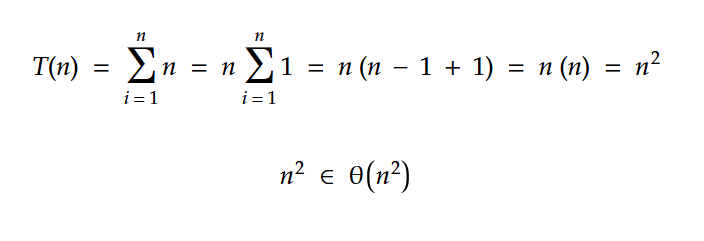
- Therefore, this algorithm is of quadradic running time.

**Pseudocode (might scrap)**
```
Initialize all men and women as free.

For each man m: next_proposal_index[m] ← 0   // who to propose to next

While there exists a free man m who still has someone to propose to:
    w ← PrefM[m][ next_proposal_index[m] ]
    next_proposal_index[m] ← next_proposal_index[m] + 1
    If w is free:
        pair m and w
    Else:
        m0 ← current partner of w
        If w prefers m over m0:
            pair m and w
            m0 becomes free
        Else:
            w rejects m (m remains free if he has more to propose)

Return matching
```

In [ ]:
# @title Code for Gale Shapely Algorithm
def gale_shapely(men_prefs, women_prefs):

  # number of men = number of women
  n = len(men_prefs)

  # Keep track of who is free (unengaged)
  free_men = list(men_prefs.keys())

  # Store the current engagements: {woman: man}, starts as an empty dictionary
  engagements = {}

  # Store the next woman each man will propose to
  next_proposal = {m: 0 for m in men_prefs.keys()}

  # While there are still free men
  while free_men:
    # Choose an arbitrary man to be the initializer
    man = free_men[0]

    # Man proposes to next woman on his list
    woman = men_prefs[man][next_proposal[man]]
    next_proposal[man] += 1

    # If the woman is free, they become engaged
    if woman not in engagements:
        engagements[woman] = man
        free_men.remove(man)
    else:
        # Woman is already engaged, check if new man is better
        current_fiance = engagements[woman]

        # Get the preference lists for the woman
        # women_prefs[woman].index(man) gives preference rank of 'man'
        # women_prefs[woman].index(current_fiance) gives preference rank of 'current_fiance'

        if women_prefs[woman].index(man) < women_prefs[woman].index(current_fiance):
            # Woman prefers the new man
            engagements[woman] = man
            free_men.remove(man)
            # The old fiance becomes free again
            free_men.append(current_fiance)
        # Else, woman prefers her current fiance, man remains free and proposes next time

    # Reformat engagements from {woman: man} to {man: woman}
    stable_matching = {v: k for k, v in engagements.items()}

  return stable_matching

In [ ]:
# @title Testing Gale Shapely Algorithm
matching = gale_shapely(men_prefs, women_prefs)
print("\nStable Matching:")
for man, woman in matching.items():
    print(f"{man} is matched with {woman}")


Stable Matching:
m3 is matched with w1
m1 is matched with w2
m2 is matched with w3


## Randomized Algorithms

The RSD algorithm is a mechanism used for one-sided matching, where only one of the sets involved has a preference list, and is commonly demonstrated with an analogy of agents to houses, where the agents have a preference of which house they obtain, but the houses do not have a preference over which agent it recieves. It becomes apparent, then, that this algorithm is a poor solution to the Stable Marriage Problem because it does not account for the women's preferences in constructing it's marriages. So for this experiment, we are using this algorithm strictly to compare running time efficiency and applications of similar problems, and we acknowledge that this algorithm would not be used to solve the Stable Marriage Problem in practice.

**Procedure in Plain English**

**Step 1:** "Pick an *arbitrary* ordering of the [men] and all [women] are marked [unengaged]." (Kun)

**Step k:** "...the first [man] in the ordering picks their top choice, and you remove their choice from the [unengaged women]." (Kun)

**End:** Reached after each man has selected a partner or exhausted his list. Each man gets his most preferred **available** woman, but not necesarily the top of his list since she may already be taken.

**Theoretical Analysis of Randomized Serial Dictatorship**

- Input Size: *n* men = *n* women
- Basic Operation: Man checking whether a woman is available. *n* men scan their list of *n* women.

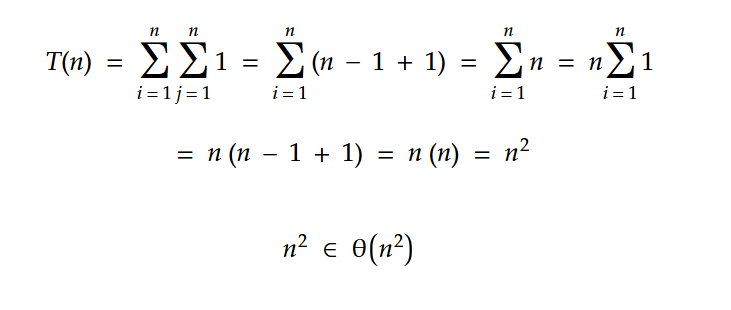
- Therefore, this algorithm is of quadratic running time.

In [ ]:
# @title Randomized Serial Dictatorship (RSD)
import random

def randomized_serial_dictatorship(men_prefs, women_prefs):

    # Create the list of men
    men = list(men_prefs.keys())

    # Track available women (not already engaged)
    women = set(women_prefs.keys())

    # Random order of proposing men
    random.shuffle(men)

    # Store the current engagements: {woman: man}, starts as an empty dictionary
    engagements = {}

    # For each man in the list
    for m in men:
        # Pick the first woman in m's preference list who is still available
        for w in men_prefs[m]:
            if w in women:
                engagements[m] = w
                women.remove(w)
                break

    return engagements


In [ ]:
# @title Testing RSD
matching = randomized_serial_dictatorship(men_prefs, women_prefs)
print("\nRandomized Matching Result:")
for man, woman in matching.items():
    print(f"{man} is matched with {woman}")



Randomized Matching Result:
m2 is matched with w2
m1 is matched with w1
m3 is matched with w3


**Procedure in Plain English**

**Step 1:** "Pick an *arbitrary* ordering of the [men] and all [women] are marked [unengaged]." (Kun) **For each man, convert his preference list into a min-heap so that his most-preferred remaining woman can be retreived efficiently.**

**Step k:** Take the next man in random order and repeatedly pop the top item from his heap. The man picks the first woman from teh heap who is still unengaged, then she is removed from the set of availble women.

**End:** Reached after each man has selected a partner from his heap. Each man gets his most preferred **available** woman, but not necesarily the top of his list since she may already be taken.

**Theoretical Analysis of Randomized Serial Dictatorship (with heaps)**

- Input Size: *n* men = *n* women
- Basic Operation: Heap pop from a man's heap (can cost up to O(logn)) and a man can pop up to n times.

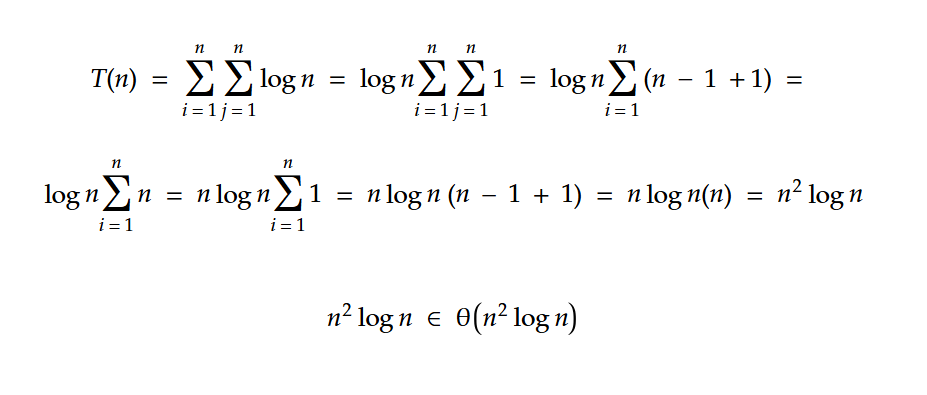
- Therefore, this algorithm is of n<sup>2</sup> log n running time.

In [ ]:
# @title Randomized Serial Dictatorship (with heaps)
import random
import heapq

def fast_randomized_matching(men_prefs, women_prefs):
    # Create the list of men
    men = list(men_prefs.keys())

    # Track available women (not already engaged)
    women = set(women_prefs.keys())

    # Random order of proposing men
    random.shuffle(men)

    # Convert each man's preference list into a heap for fast access
    men_heaps = {}

    # For each man in the list
    for m in men:
        # Assign a random priority to each woman to break ties randomly
        men_heaps[m] = [(i, w) for i, w in enumerate(men_prefs[m])]
        heapq.heapify(men_heaps[m])

    # Store the current engagements: {woman: man}, starts as an empty dictionary
    engagements = {}

    # For each man in the list
    for m in men:
        while men_heaps[m]:
            # '_' here essentially means "There is a value here, but we don't care about it"
            # (only one value in the tuple is useful)"
            _, w = heapq.heappop(men_heaps[m])
            if w in women:
                engagements[m] = w
                women.remove(w)
                break

    return engagements


In [ ]:
# @title Testing RSD (with heaps)
matching = fast_randomized_matching(men_prefs, women_prefs)
print("\nRandomized Matching Result:")
for man, woman in matching.items():
    print(f"{man} is matched with {woman}")



Randomized Matching Result:
m1 is matched with w1
m2 is matched with w2
m3 is matched with w3


## Irving's Algorithm (Stable Roommates Problem)

This algorithm does not take in two preference lists, and instead takes in a single set of even cardinality *n*. Each member in the set ranks all others in order of preference, and a stable matching is a partition of this single set into n/2 pairs of roommates such that no two people who are not roommates both prefer each other to their actual partners. For this algorithm, there exists intances for which no stable matching is possible. (Irving)

**Procedure in Plain English**

=== Phase One ===

**Step 1:** Everyone is initialized as unmatched.

**Step k:** A person proposes to the first name on their list. The receiver checks whether this proposer is acceptable.
- If the receiver has already removed the proposer earlier, the proposer deletes the receiver and must try again later.
- Otherwise, the receiver keeps the proposer and removes *everyone they prefer less.*

Whenever someone is removed from another's list, they also remove the trimmer from their own list, which may cause some people to become free again and re-propose to their next top choice.

**End:** Reached when no one is free or someone's list becomes empty, which implies **no stable matching exists.**

=== Phase 2 ===

**Step 1:** If a person has more than one name remaining, the following relationship is used:
- A person "points to" to the **first** person on their list.
- That person "points back" using the **last** name on their list.

**Step k:** If a person A points to B and B points back to someone other than A, then:
- A and B cannot be part of any stable matching.
- They delete each other from their lists.

**End:** Reached when no more changes occur or someone's list becomes empty, which implies **no stable matching exists.**

=== Check for Stable Matching ===

If everyone's list contains exactly one remaining candidate, we construct the matching. If any list has more or fewer than one name, this implies **no stable matching exists.**

**Theoretical Analysis of Irving's Algorithm**

- Input Size: *n* participants
- Basic Operation: A deletion of a person from another's preference list. There are *n* participants each with a list of at most *n - 1* others.

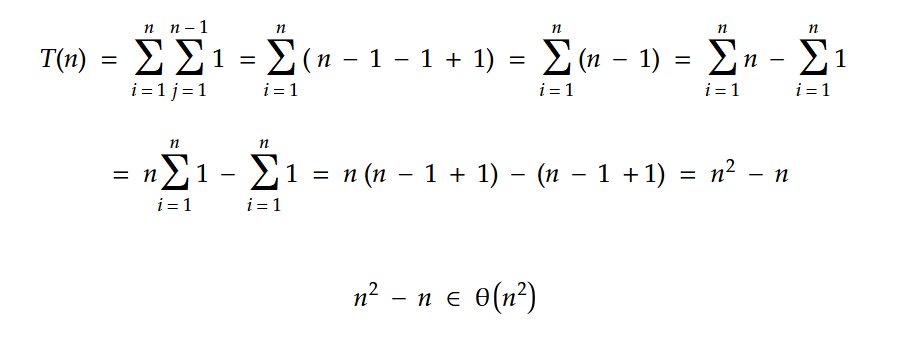
- Therefore, this algorithm is of quadratic running time.


**Pseudocode (might scrap)**
```
"""
Implements Irving's algorithm for the Stable Roommates problem.

Input:
  preferences: dict[str, list[str]]
    Each participant's preference list (complete ranking of all others)

Output:
  matching: dict[str, str] or None
    Stable pairing (symmetric, e.g., {A: B, B: A, ...})
    or None if no stable matching exists.
"""
// Initialize each person as free
For each person p:
    next_proposal_index[p] ← 0   // who to propose to next
    list[p] ← Pref[p]            // copy of preference list

// Phase 1: Proposals
While there exists a person p whose list is non-empty and p has not been semi-engaged:
    q ← list[p][ next_proposal_index[p] ]
    next_proposal_index[p] ← next_proposal_index[p] + 1

    If q is not yet “semi-engaged”:
        pair p and q as temporary partners
    Else:
        r ← current first person in q’s list
        If q prefers p over r:
            Remove all people after p in q’s list
            r becomes free (if needed)
            pair p and q
        Else:
            Remove q from p’s list

// Phase 2: Eliminate rotations
For each person p:
    While there exists a rotation in p’s list:
        Remove the rotation:
            For each person in the rotation:
                Remove the second person in their list
    If any person’s list is empty:
        No stable matching exists
        Return failure

Return matching


```

In [6]:
# @title Irving's Algorithm (Stable Roommates Problem)
def irving_algorithm(preferences):

    # Make deep copies of preference lists (we’ll modify them)
    prefs = {p: lst.copy() for p, lst in preferences.items()}

    # ---------- Phase 1: Proposal and rejection phase ----------
    free = list(prefs.keys())

    while free:
        person = free.pop(0)
        if not prefs[person]:
            # No one left to propose to → no stable matching possible
            return None

        top_choice = prefs[person][0]

        # If top_choice also prefers 'person' to their current last option, accept tentatively
        if person not in prefs[top_choice]:
            # top_choice has already rejected this person earlier
            prefs[person].remove(top_choice)
            free.append(person)
        else:
            # top_choice considers 'person' and possibly trims worse options
            others = prefs[top_choice]
            index_of_person = others.index(person)
            # Remove all names worse than 'person'
            for rejected in others[index_of_person + 1:]:
                prefs[rejected].remove(top_choice)
            prefs[top_choice] = others[:index_of_person + 1]

    # ---------- Phase 2: Eliminate rotations ----------
    changed = True
    while changed:
        changed = False
        for person in prefs:
            if len(prefs[person]) > 1:
                # Each person points to the first on their list and is pointed to by last
                first = prefs[person][0]
                last = prefs[first][-1]
                if last != person:
                    # Remove each from other's list
                    prefs[person].remove(first)
                    prefs[first].remove(person)
                    changed = True

    # ---------- Check for valid matching ----------
    for p in prefs:
        if len(prefs[p]) != 1:
            return None  # Not stable

    # Create matching dictionary (symmetric)
    matching = {}
    for p in prefs:
        partner = prefs[p][0]
        matching[p] = partner

    return matching


In [7]:
# @title Testing Irving's Algorithm
result = irving_algorithm(roommates_prefs)
if result:
    print("Stable Roommate Matching Found:")
    for p, partner in result.items():
        print(f"{p} ↔ {partner}")
else:
    print("No stable matching exists for this instance.")


No stable matching exists for this instance.


## Sources Used
- Austin, David. "The Stable Marriage Problem and School Choice." *American Mathematical Society*, March 2015, [ams.org](https://www.ams.org/publicoutreach/feature-column/fc-2015-03). Accessed 13 Nov. 2025.

- Irving, Robert W. “An Efficient Algorithm for the ‘Stable Roommates’ Problem.” *Journal of Algorithms*, Volume 6, Issue 4, December 1985, Pages 577-595, [sciencedirect.com](https://www.sciencedirect.com/science/article/abs/pii/0196677485900331). Accessed 12 Nov. 2025.

- Kun, Jeremy. "Serial Dictatorships and House Allocation." *Math ∩ Programming*, October 2015, [jeremykun.com](https://www.jeremykun.com/2015/10/26/serial-dictatorships-and-house-allocation/). Accessed 13 Nov. 2025.

- OpenAI. ChatGPT, version 5.1, OpenAI, 2025. Accessed 12 Nov. 2025.